# Kickstarter EDA
## Load data

In [1]:
#Load the Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("sample")

In [3]:
print(df.nunique())
print(df.shape)

location_country              203
location_state               1240
location_localized_name     12403
location_name               14256
backers_count                3586
goal                         5978
pledged                     50144
creator_name               191092
gender                          6
category_broad                 15
category_name                 158
launched_at                233692
deadline                   216416
state_changed_at           219759
state                           5
life                        66290
duration                    79775
prep                       217248
slug                       233923
blurb                      231840
dtype: int64
(321706, 20)


In [4]:
df.isnull().sum()

location_country            1031
location_state              1081
location_localized_name    76464
location_name               1031
backers_count                  0
goal                           0
pledged                        0
creator_name                   0
gender                         0
category_broad                 0
category_name                  0
launched_at                    0
deadline                       0
state_changed_at               0
state                          0
life                           0
duration                       0
prep                           0
slug                           0
blurb                         25
dtype: int64

## Processing

In [11]:
df["launched_year"] = df['launched_at'].dt.year
df['pledged_log'] = np.log(df['pledged']+1)
df['goal_log'] = np.log(df['goal']+1)

## Visualize

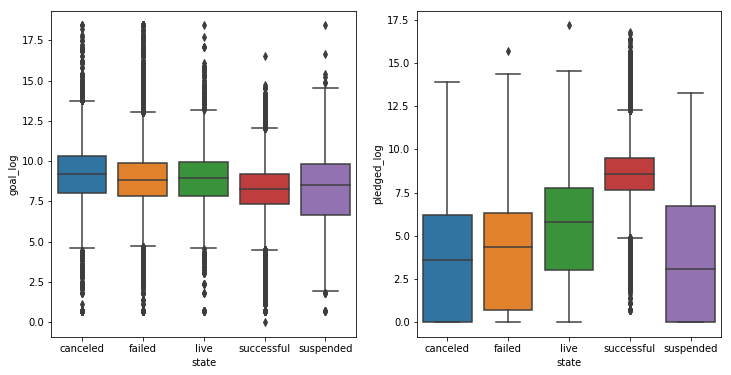

In [12]:
# Do successful projects set a more realistic goal?

plt.figure(figsize=(12,6))

plt.subplot(121)
sns.boxplot(x='state', y="goal_log", data = df)

plt.subplot(122)
sns.boxplot(x='state', y="pledged_log", data = df)

plt.savefig('plots/goal_status.png')

Successful projects on average asked for a smaller goal than cancelled or failed projects. The final pledged amount concentrated between 1000 - 20000

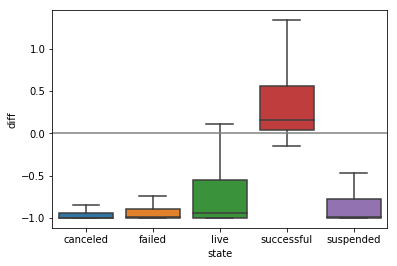

In [13]:
# How much under/over perform?

df['diff'] = df['pledged']/df['goal'] - 1
sns.boxplot(x = 'state', y = 'diff', data = df, showfliers=False)
plt.axhline(0, color="gray")

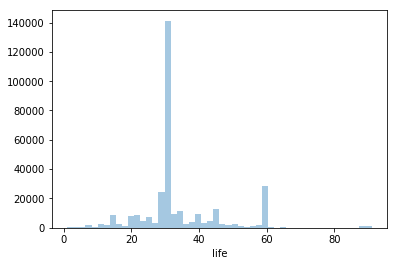

In [14]:
# How much time you need to raise money? 30 or 60 days to choose from. 
sns.distplot(df["life"].dt.days, kde = False)

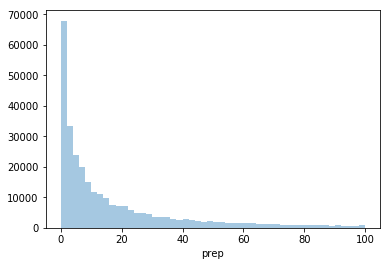

In [15]:
# Duration between the campaign is created and the campaign went live

sns.distplot(df[df['prep'].dt.days <= 100]["prep"].dt.days, kde = False)

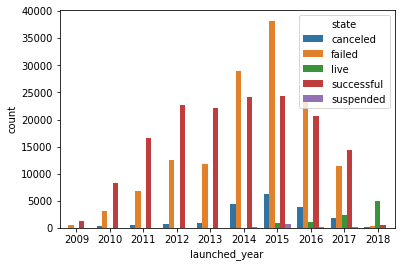

In [16]:
sns.countplot(x='launched_year', data = df, hue='state')
plt.savefig("plots/state_year.png")

In [44]:
import imgkit
def percentable(df,row,col,name):
    table = pd.crosstab(df[row],df[col]).apply(lambda r:r/r.sum(), axis = 1).round(2)
    styled_table = table.sort_values('successful', ascending=False).style.background_gradient(cmap='Greens')
    html = styled_table.render()
    output = imgkit.from_string(html, 'plots/'+name+'_table.png')
    return(output)

In [45]:
# do successful rates change over time? (due to popularity of the platform?)
percentable(df,'launched_year','state', name = "year")

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [39]:
# which category are more likely to succeed?
percentable(df,'category_broad','state', name = "cat")

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [41]:
# Do success rates vary by perception of gender?
percentable(df,'gender','state', name = "gender")

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [47]:
# which MSA has the highest rate of success?
# percentable(df[df.top100 ==1],'cbsa_name','state', name = "cbsa")

In [41]:
# df_USA = df[df.location_country == "US"]
# df_USA.to_csv('kickstarter.csv')